In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from scipy.optimize import root


kcant =  10
l0 = 200
xi = 0.5
tr = 0.2
lp = 50
K = 1100
L = 300
kT = 4.1
mu = 2./kT
etaH2O = 0.89
aeff = 25000
heff = 5000
tf = 2.
dt = 10**-4
steps = int(tf/dt)
dU0 = 25
yB = 1.
ycusp = yB/2
dU = 16*dU0/yB**4.
beta = 1/4.1
k0, d = .1*10**-3, .4
dG = 20
nu = 2/3
v = 100.

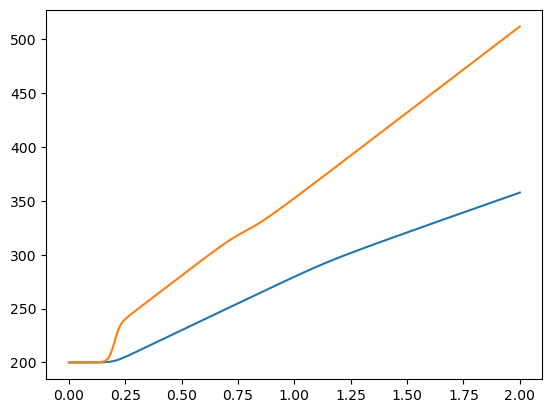

In [3]:
xeq = np.genfromtxt('xeq.csv', delimiter=',')
# lamcd = np.genfromtxt('lamcdtab.csv', delimiter=',')
lamcd = np.genfromtxt('lamcdtab_160..csv', delimiter=',')
plt.plot(np.linspace(0.,tf, len(xeq)),xeq)
plt.plot(lamcd[:,0],lamcd[:,1])
# print(len(lamcd), steps)

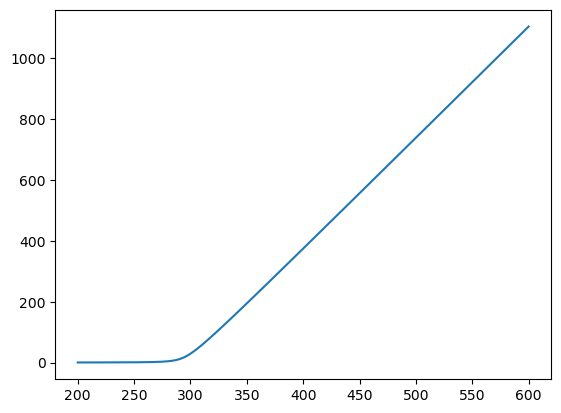

In [12]:
xtab = np.linspace(200,600,20000)
Fmol = []
Fmol0 = 0.
for i in range(len(xtab)):
    x = xtab[i]
    def func(Fx):
        return Fx - kT/lp*(.25/(1-x/L+Fx/K)**2.-.25+x/L-Fx/K)
    if i == 0:
        sol = root(func, Fmol0)
    else:
        sol = root(func, Fmol[-1])
    Fmol.append(sol.x[0])
    
plt.plot(xtab, Fmol)
Feq = Fmol

    

/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_55984/394007190.py:3: RuntimeWarning: invalid value encountered in sqrt
  return  k0*(1.-nu*F*d/dG)**(1/nu-1)*np.exp(beta*dG*(1-(1.-nu*F*d/dG)**(1/nu)))
/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_55984/394007190.py:3: RuntimeWarning: invalid value encountered in power
  return  k0*(1.-nu*F*d/dG)**(1/nu-1)*np.exp(beta*dG*(1-(1.-nu*F*d/dG)**(1/nu)))


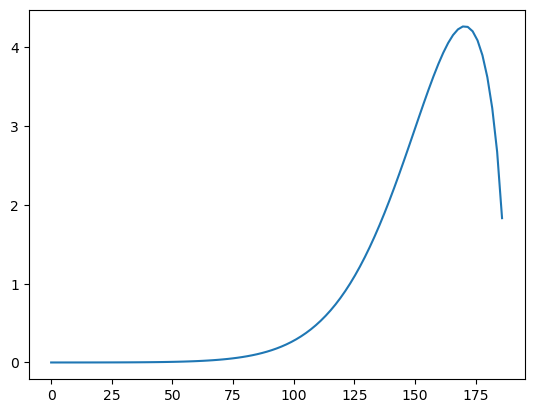

In [5]:
dG = 50
def kdhz(F):
    return  k0*(1.-nu*F*d/dG)**(1/nu-1)*np.exp(beta*dG*(1-(1.-nu*F*d/dG)**(1/nu))) 
FF = np.linspace(0.,200.,100)
plt.plot(FF,kdhz(FF))

v =  95
Regular pulling
CD pulling


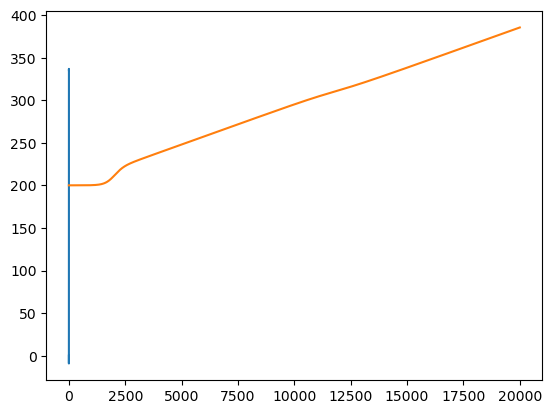

205.6516406543053 1.469345032094805
243.99814473754148 1.387335060430154


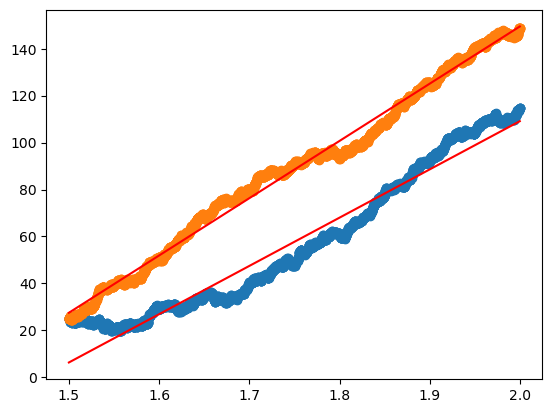

getting equilibrium trajs
v =  100
Regular pulling
CD pulling


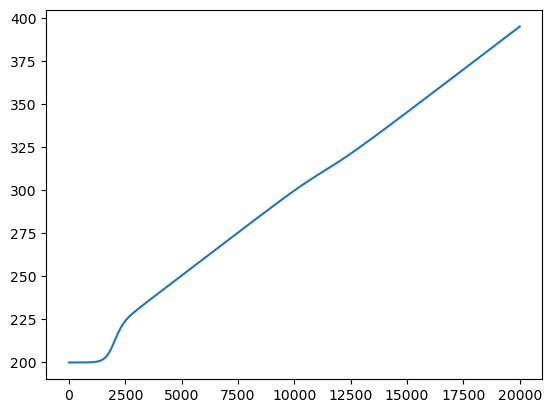

215.9460405067168 1.4243042397183399
275.2454854027152 1.3679082656034356


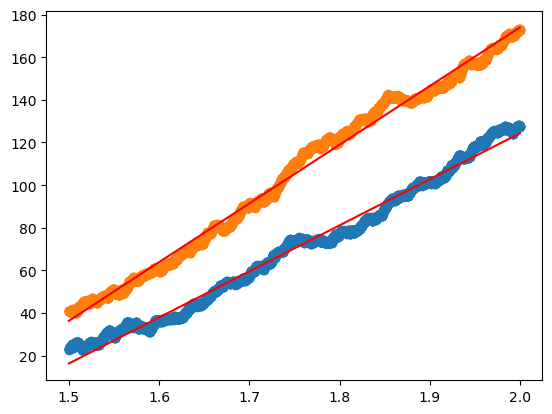

getting equilibrium trajs
v =  105
Regular pulling
CD pulling


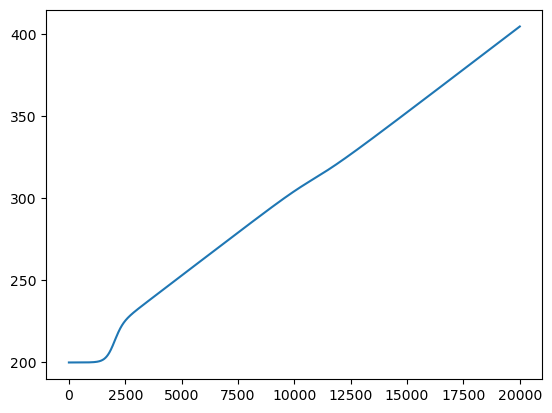

255.31235426017565 1.4118824899915345
280.43229367657904 1.3259934002749387


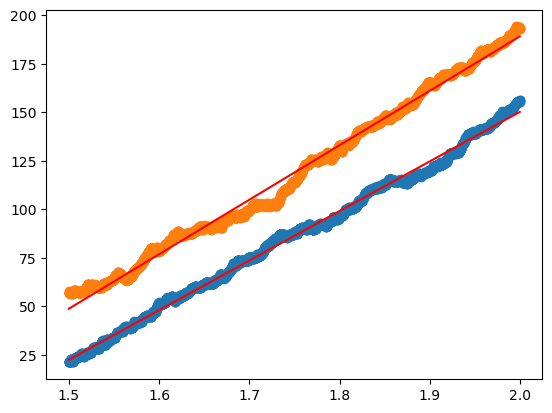

getting equilibrium trajs
v =  110
Regular pulling
CD pulling


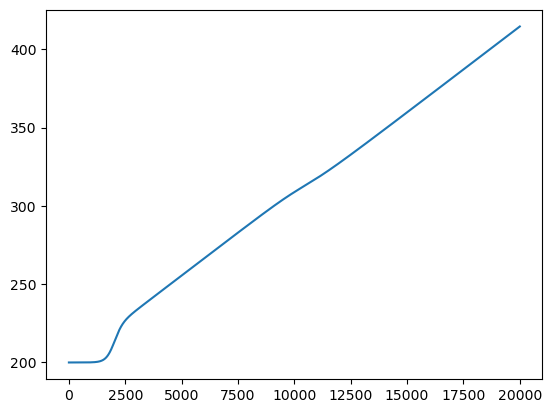

277.8368312986994 1.3977841574163237
286.3951195598693 1.2772910910149065


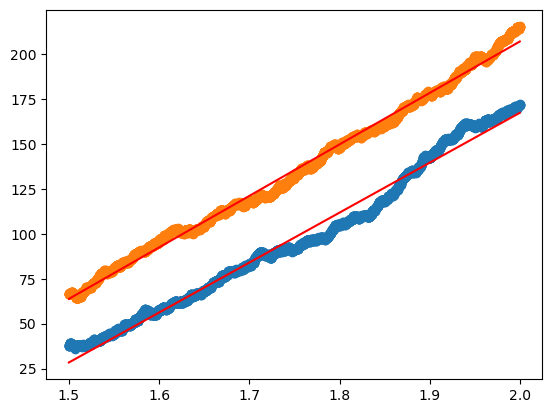

getting equilibrium trajs
v =  115
Regular pulling
CD pulling


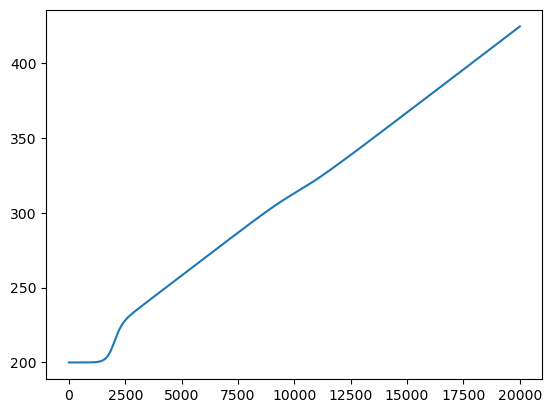

295.06994317492257 1.3597267352355886
309.9237542954337 1.2480050235683953


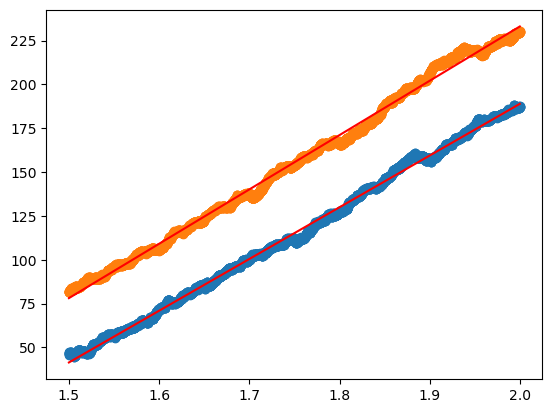

getting equilibrium trajs
v =  120
Regular pulling
CD pulling


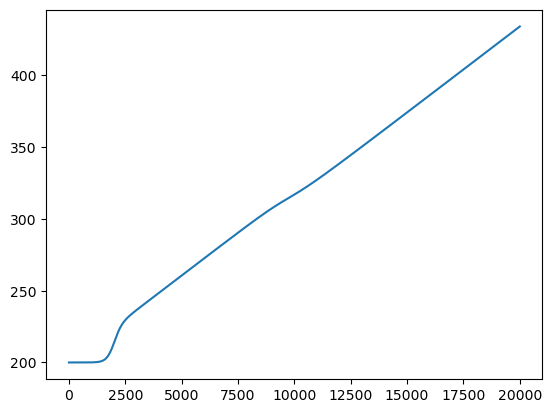

327.29967455400583 1.3554403158845167
319.86995480846633 1.2001499552721644


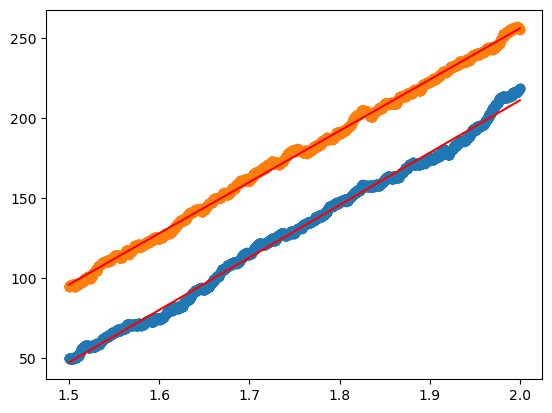

getting equilibrium trajs
v =  125
Regular pulling
CD pulling


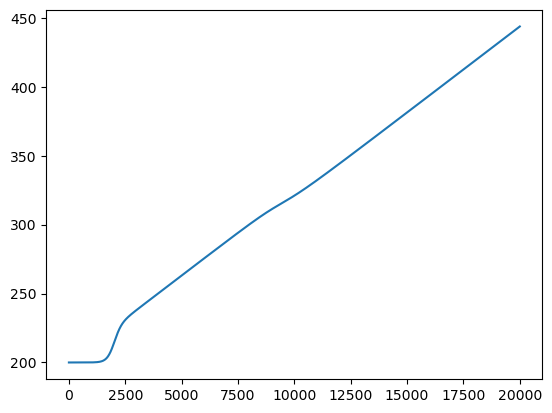

315.1103687317716 1.2934843451606615
324.3331382679928 1.1724754121948373


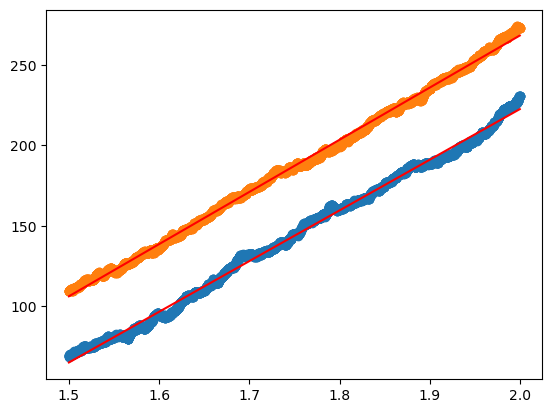

getting equilibrium trajs
v =  130
Regular pulling
CD pulling


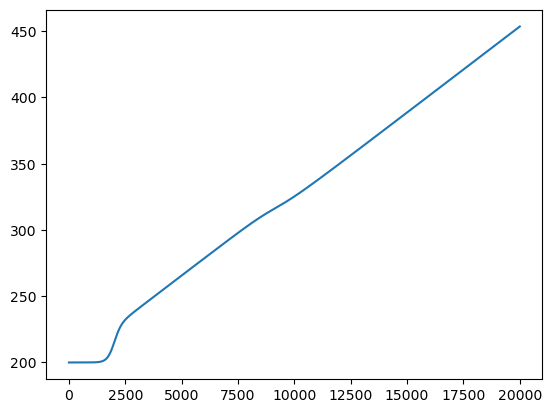

340.71832317278967 1.2781522792016844
322.8585357652896 1.0912631216330588


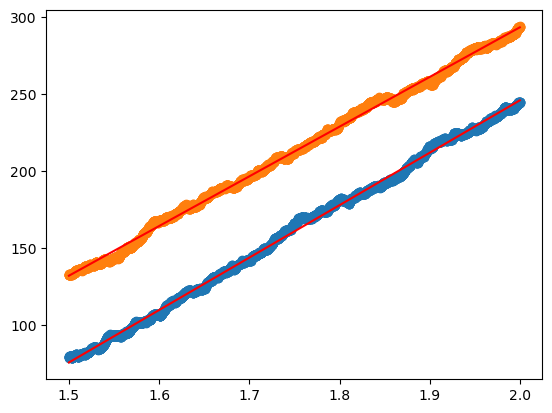

getting equilibrium trajs
v =  135
Regular pulling
CD pulling


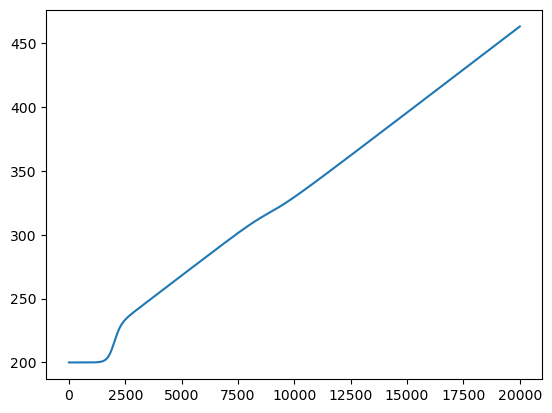

312.6089710180124 1.1942667676913854
372.83057972825173 1.123554811419993


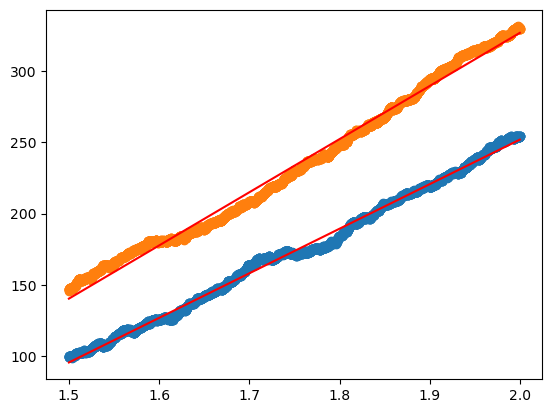

getting equilibrium trajs
v =  140
Regular pulling
CD pulling


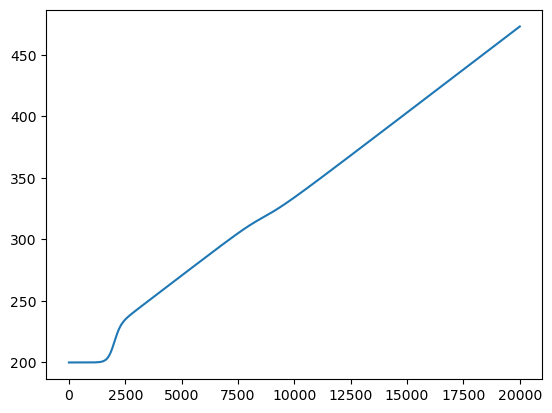

369.67300931075147 1.2294662624356874
396.87392514661553 1.1408819796019543


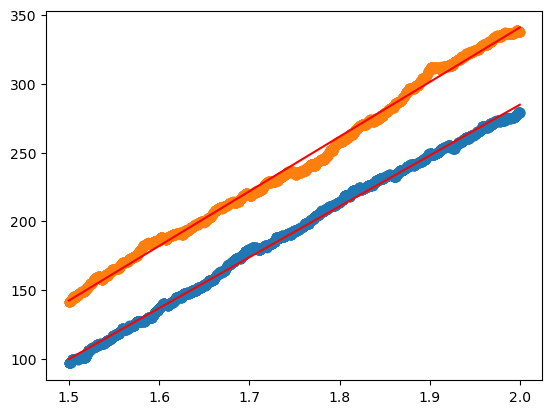

getting equilibrium trajs
v =  145
Regular pulling
CD pulling


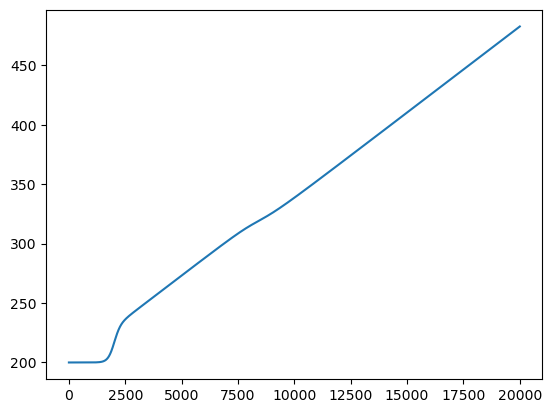

395.4841038143123 1.2386672888329135
391.6220769658138 1.071646723583863


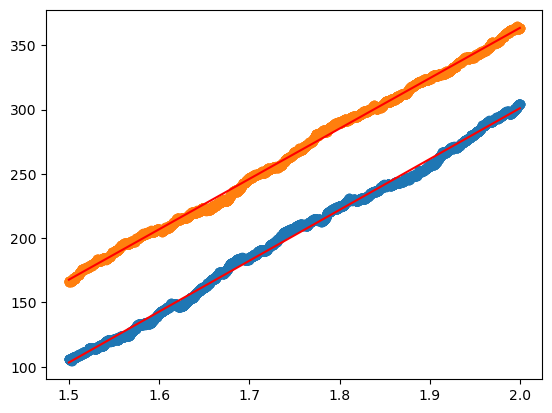

getting equilibrium trajs
v =  150
Regular pulling
CD pulling


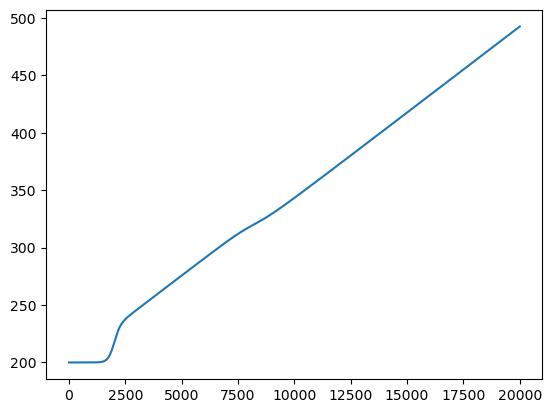

376.0790864709654 1.155774094250567
395.89783273401736 1.0424754134410368


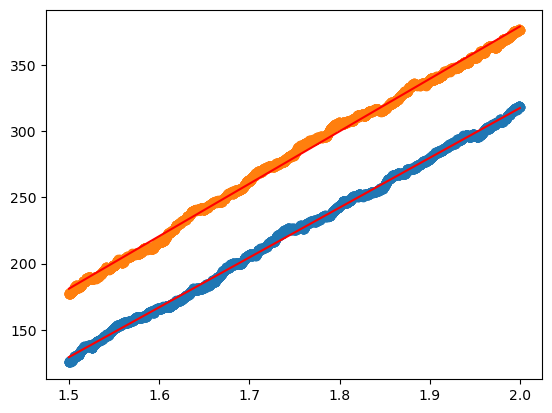

getting equilibrium trajs
v =  155
Regular pulling
CD pulling


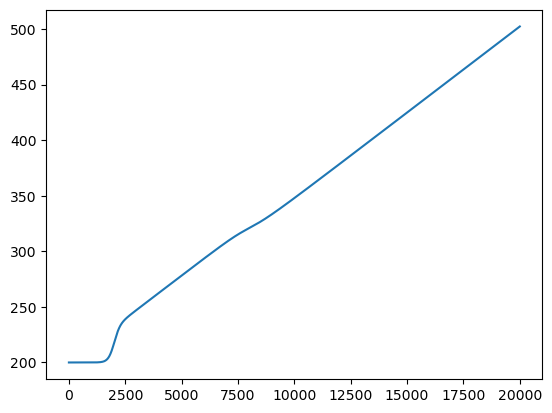

417.363709879889 1.1756019831258893
417.0273930124865 1.0518109104414888


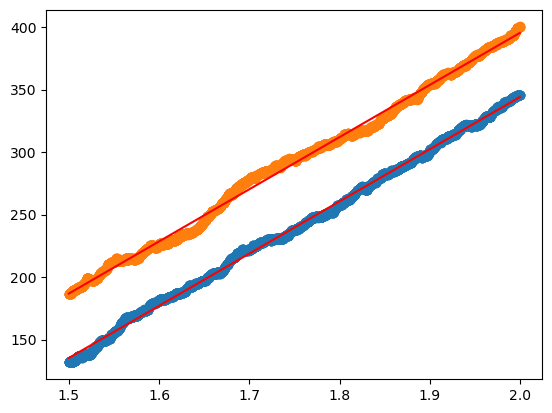

getting equilibrium trajs
v =  160
Regular pulling
CD pulling


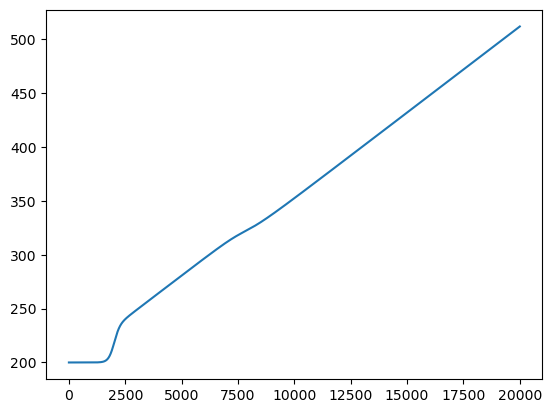

440.3905295741088 1.1880156977658731
434.1655360129678 1.0159025696225505


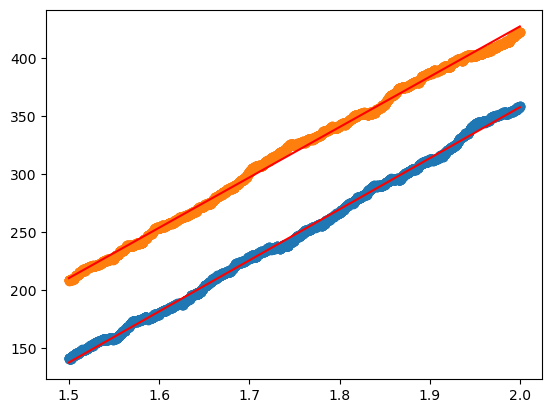

getting equilibrium trajs
v =  165
Regular pulling
CD pulling


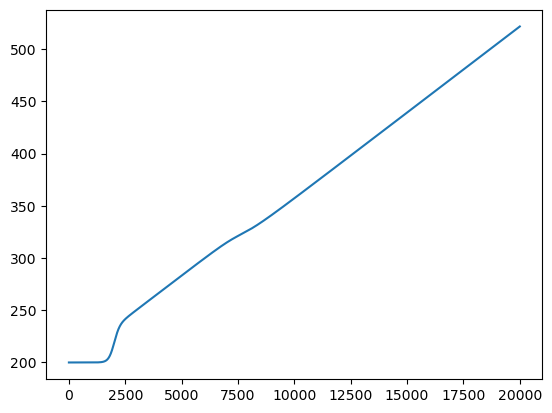

440.76852273611155 1.1404990716410086
454.21885747198695 1.012003999809155


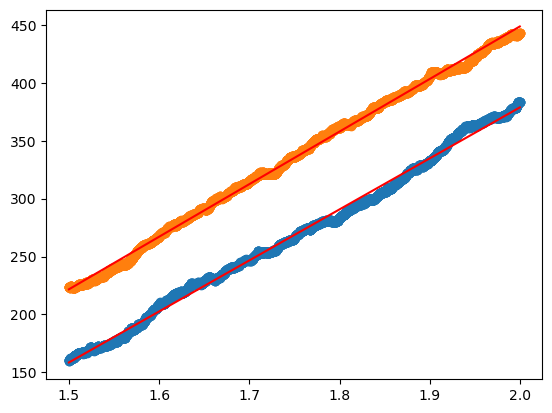

getting equilibrium trajs


In [23]:
from numba import jit
@jit(nopython=True)
def linear_interpolation(x1, y1, x2, y2, x_interpolate):

    # Calculate the slope of the line passing through the two points
    slope = (y2 - y1) / (x2 - x1)
    
    # Calculate the y-intercept of the line
    intercept = y1 - slope * x1
    
    # Calculate the interpolated y value using the equation of the line
    y_interpolate = slope * x_interpolate + intercept
    
    return y_interpolate



@jit(nopython=True)
def traj(v,Fmoltab,xtab, seed):
    dx = xtab[1]-xtab[0]
    np.random.seed(seed)
#     print('seed = ', seed)
    x,t = 200,0.
    kM = 100.
    y = 0
    trup = 0.
    D0 = 1960 #nm^2/s
    D00 = .392 #(nm/s)
    trig = False
    dt = .0001
    xt, Fcantt, l, xeq, Fexpmol, Dx = np.zeros(steps),np.zeros(steps),np.zeros(steps),np.zeros(steps),np.zeros(steps),np.zeros(steps)
    for i in range(steps):
        lt = l0 + np.log(1+np.exp(xi*(t-tr)*v))/xi
        Fcant = kcant*(lt-x)
        ind = int(np.floor((x-200)/dx))
#         print(ind, lt)
        x1, y1, x2, y2 = xtab[ind], Fmoltab[ind], xtab[ind+1], Fmoltab[ind+1]
        Fmol = linear_interpolation(x1, y1, x2, y2, x)
#         print(Fmol, dx, Fcant)
        Dxi = D0 + D00*x 
        Dxi = 2.
#         Dxi = 1.
        F = Fcant - Fmol
#         print(x, Fcant, lt, 0., kcant*(lt-x)-kT*v/Dxi, Dxi)
        xt[i], Fcantt[i], l[i], xeq[i], Fexpmol[i], Dx[i] = x, Fcant, lt, 0., kcant*(lt-x)-kT*v/Dxi, Dxi
        x = x + dt*F*mu + (2*2.*dt)**.5*np.random.randn()

        dF = 1.-nu*Fmol*d/dG
        kF = k0*(dF)**(1/nu-1)*np.exp(beta*dG*(1-dF**(1/nu))) 
        if dt*kF > np.random.rand() and trig == False:
            trig = True
            trup = t

        t += dt
     
        
    return np.asarray(xt), np.asarray(Fcantt), np.asarray(l),np.asarray(xeq), np.asarray(Fexpmol), trup


@jit(nopython=True)
def traj_trup(v,Fmoltab,xtab, seed):
    dx = xtab[1]-xtab[0]
    np.random.seed(seed)
#     print('seed = ', seed)
    x,t = 200,0.
    kM = 100.
    y = 0
    trup = 0.
    D0 = 1960 #nm^2/s
    D00 = .392 #(nm/s)
    trig = False
    dt = .0001
#     xt, Fcantt, l, xeq, Fexpmol, Dx = np.zeros(steps),np.zeros(steps),np.zeros(steps),np.zeros(steps),np.zeros(steps),np.zeros(steps)
    for i in range(steps):
        lt = l0 + np.log(1+np.exp(xi*(t-tr)*v))/xi
        Fcant = kcant*(lt-x)
        ind = int(np.floor((x-200)/dx))
#         print(ind, lt)
        x1, y1, x2, y2 = xtab[ind], Fmoltab[ind], xtab[ind+1], Fmoltab[ind+1]
        Fmol = linear_interpolation(x1, y1, x2, y2, x)
#         print(Fmol, dx, Fcant)
        Dxi = D0 + D00*x 
        Dxi = 2.
#         Dxi = 1.
        F = Fcant - Fmol
#         print(x, Fcant, lt, 0., kcant*(lt-x)-kT*v/Dxi, Dxi)
#         xt[i], Fcantt[i], l[i], xeq[i], Fexpmol[i], Dx[i] = x, Fcant, lt, 0., kcant*(lt-x)-kT*v/Dxi, Dxi
        x = x + dt*F*mu + (2*2.*dt)**.5*np.random.randn()

        dF = 1.-nu*Fmol*d/dG
        kF = k0*(dF)**(1/nu-1)*np.exp(beta*dG*(1-dF**(1/nu))) 
        if dt*kF > np.random.rand() and trig == False:
            trig = True
            trup = t
            Frup =  kcant*(lt-x)
            break

        t += dt
     
        
    return trup, Frup

x, Fcant, l, xeqi, Fexpmol, trup = traj(v,np.asarray(Fmol), xtab, 3836)

plt.plot(np.linspace(0, tf, int(tf/dt)),Fcant)
# plt.plot(Fexpmol)
# plt.show()


@jit(nopython=True)
def trajcd(v,lamcd, Fmoltab, xtab, seed):
    dx = xtab[1]-xtab[0]
    np.random.seed(seed)
    x,t = 200,0.
    y = 0
    trig = False
    dt = .0001
    xt, Fcantt, l, xeq, Fexpmol, Dx = np.zeros(steps-1),np.zeros(steps-1),np.zeros(steps-1),np.zeros(steps-1),np.zeros(steps-1),np.zeros(steps-1)
    for i in range(steps-1):
        lt = lamcd[i]
        Fcant = kcant*(lt-x)
        ind = int(np.floor((x-200)/dx))
        x1, y1, x2, y2 = xtab[ind], Fmoltab[ind], xtab[ind+1], Fmoltab[ind+1]
        Fmol = linear_interpolation(x1, y1, x2, y2, x)

        Dxi = 2.
        F = Fcant - Fmol
        
        xt[i], Fcantt[i], l[i], xeq[i], Fexpmol[i], Dx[i] = x, Fcant, lt, 0., kcant*(lt-x)-kT*v/Dxi, Dxi
        x = x + dt*F*mu + (2*Dxi*dt)**.5*np.random.randn()

        dF = 1.-nu*Fmol*d/dG
        kF = k0*(dF)**(1/nu-1)*np.exp(beta*dG*(1-dF**(1/nu))) 
        if dt*kF > np.random.rand() and trig == False:
            trig = True
            trup = t
            

        t += dt
 
    return np.asarray(xt), np.asarray(Fcantt), np.asarray(l),np.asarray(xeq), np.asarray(Fexpmol), np.asarray(Dx), trup


@jit(nopython=True)
def traj_trup_cd(v,lamcd, Fmoltab, xtab, seed):
    dx = xtab[1]-xtab[0]
    np.random.seed(seed)
    x,t = 200,0.
    y = 0
    trig = False
    dt = .0001
#     xt, Fcantt, l, xeq, Fexpmol, Dx = np.zeros(steps-1),np.zeros(steps-1),np.zeros(steps-1),np.zeros(steps-1),np.zeros(steps-1),np.zeros(steps-1)
    for i in range(steps-1):
        lt = lamcd[i]
        Fcant = kcant*(lt-x)
        ind = int(np.floor((x-200)/dx))
        x1, y1, x2, y2 = xtab[ind], Fmoltab[ind], xtab[ind+1], Fmoltab[ind+1]
        Fmol = linear_interpolation(x1, y1, x2, y2, x)

        Dxi = 2.
        F = Fcant - Fmol
        
#         xt[i], Fcantt[i], l[i], xeq[i], Fexpmol[i], Dx[i] = x, Fcant, lt, 0., kcant*(lt-x)-kT*v/Dxi, Dxi
        x = x + dt*F*mu + (2*Dxi*dt)**.5*np.random.randn()

        dF = 1.-nu*Fmol*d/dG
        kF = k0*(dF)**(1/nu-1)*np.exp(beta*dG*(1-dF**(1/nu)))
        if dt*kF > np.random.rand() and trig == False:
            trig = True
            trup = t
            Frup =  kcant*(lt-x)
            break
            

        t += dt
 
    return trup, Frup


@jit(nopython=True)
def traj_trup_Feq(Feq, seed):
    np.random.seed(seed)

    dt = .0001
    t = 0.
#     xt, Fcantt, l, xeq, Fexpmol, Dx = np.zeros(steps-1),np.zeros(steps-1),np.zeros(steps-1),np.zeros(steps-1),np.zeros(steps-1),np.zeros(steps-1)
    for i in range(len(Feq)):
        
        Fmol = Feq[i]
        dF = 1.-nu*Fmol*d/dG
        kF = k0*(dF)**(1/nu-1)*np.exp(beta*dG*(1-dF**(1/nu))) 
        if dt*kF > np.random.rand():
            trup = t
            Frup = Fmol
            break
            

        t += dt
 
    return trup, Frup

def get_trup_tab_Feq(Feq,num_trajs = 500):
    trup, F = np.zeros(num_trajs), np.zeros(num_trajs)
    for i in range(num_trajs):
    #     print(i)
        seed = np.random.choice(np.arange(1099000))
    #     print(seed)
        trup[i], F[i] = traj_trup_Feq(Feq, seed)
#         print(i,trup[i])
    return trup, F


def get_rexo_t0(Fcant, Fcantcd, tt):
    
    # Generate some example data points
    x_data = tt[:-1][-5000:]
    y_data = Fcant[:-1][-5000:]
    
    from scipy.optimize import curve_fit
    def equation(t, rexp, t0):
        return rexp*(t-t0)

    # Fit the equation to the data
    params, covariance = curve_fit(equation, x_data, y_data)

    # Extract the parameters of the fitted equation
    rexp_fit, t0_fit = params
    
    print(rexp_fit, t0_fit)
    # Generate the fitted curve
    y_fit = equation(x_data, rexp_fit, t0_fit)

    # Plot the original data and the fitted curve
    plt.scatter(x_data, y_data, label='Data points')
    plt.plot(x_data, y_fit, color='red', label='Fitted curve')


    # Generate some example data points
    x_data = tt[:-1][-5000:]
    y_data = Fcantcd[:-1][-5000:]

    # Fit the equation to the data
    params, covariance = curve_fit(equation, x_data, y_data)

    # Extract the parameters of the fitted equation
    rexp_fitcd, t0_fitcd = params
    print(rexp_fitcd, t0_fitcd)
    # Generate the fitted curve
    y_fit = equation(x_data, rexp_fitcd, t0_fitcd)

    # Plot the original data and the fitted curve
    plt.scatter(x_data, y_data, label='Data points')
    plt.plot(x_data, y_fit, color='red', label='Fitted curve')
    plt.show()
    
    return rexp_fit, t0_fit, rexp_fitcd, t0_fitcd


# xcd, Fcantcd, lcd, xeqcd, Fexpmolcd,Dxcd, trupcd = trajcd(v,lamcd,np.asarray(Fmol), xtab, 39383)
# plt.plot(np.linspace(0, dt*len(Fcantcd), len(Fcantcd)),Fcantcd)
# plt.plot(np.linspace(0, dt*len(Feq), len(Feq)),Feq)
# plt.axvline(trup)
# plt.axvline(trupcd)
# plt.show()
# plt.plot(np.linspace(0, dt*len(l), len(l)),l)
# plt.plot(np.linspace(0, dt*len(x), len(x)),x)
# plt.plot(np.linspace(0, dt*len(xcd), len(xcd)),xcd)
# plt.plot(np.linspace(0.,tf, len(xeq)),xeq, '--')
# plt.show()


def get_trup_tab(v,Fmoltab, xtab,num_trajs = 500):
    truptab, F = np.zeros(num_trajs), np.zeros(num_trajs)
    for i in range(num_trajs):
    #     print(i)
        seed = np.random.choice(np.arange(1099000))
    #     print(seed)
        truptab[i], F[i] = traj_trup(v,Fmoltab, xtab,seed)
#         print(i,truptab[i])
    return truptab, F


def get_trup_tab_cd(v,lamcd,Fmoltab, xtab,num_trajs = 500):
    trupcd, F = np.zeros(num_trajs), np.zeros(num_trajs)
    for i in range(num_trajs):
    #     print(i)
        seed = np.random.choice(np.arange(1099000))
    #     print(seed)
        trupcd[i], F[i] = traj_trup_cd(v,lamcd,Fmoltab, xtab, seed)
#         print(i,trupcd[i])
    return trupcd, F



def do_exps(vtab, numtrajs = 1):
    
#     print('Equilibrium rate')
#     ttab0 = np.zeros(numtrajs)
#     for i in range(numtrajs):
#         ttab0[i] = trajk0(0,np.random.choice(np.arange(23939)))
#     lnk0, d = np.log(1/np.mean(ttab0)), .5
    
    trup, trupcd,F, Fcd, rtab, t0tab, rcdtab, t0cdtab = [], [], [], [], [], [], [], []
    trupeq, Frup_eq = [],[]
    for v in vtab:
        print('v = ', v)
        tt =np.linspace(0, tf, steps)
        
        x, Fcant, l,xeq,Fexpmol,trupv = traj(v,np.asarray(Fmol), xtab,np.random.choice(np.arange(349348383)))
        print('Regular pulling')
        ti, Fi = get_trup_tab(v,np.asarray(Fmol), xtab,numtrajs)
        trup.append(ti)
        F.append(Fi)
        
        
       
        print('CD pulling')
#         xeq = np.genfromtxt('xeq.csv', delimiter=',')
        lamcd = np.genfromtxt('lamcdtab_'+str(int(v))+'..csv', delimiter=',')[:,1]
        plt.plot(lamcd)
        plt.show()
        ti, Fi = get_trup_tab_cd(v,lamcd,np.asarray(Fmol), xtab, numtrajs)
        trupcd.append(ti)
        Fcd.append(Fi)
        
        xcd, Fcantcd, lcd,xeqcd,Fexpmolcd,Dx,t = trajcd(v,lamcd,np.asarray(Fmol), xtab, np.random.choice(np.arange(23939)))
        
#         fitting r and t0
        r, t0, rcd, t0cd = get_rexo_t0(Fexpmol, Fexpmolcd, tt)
#         r, t0, rcd, t0cd = get_rexo_t0(Fcant, Fcantcd, tt)
        rtab.append(r)
        t0tab.append(t0)
        rcdtab.append(rcd)
        t0cdtab.append(t0cd)
        
        
        Feq = np.genfromtxt('Feq_'+str(int(v))+'..csv', delimiter=',')[:,1]
        
        print('getting equilibrium trajs')
        ti, Fi = get_trup_tab_Feq(Feq, num_trajs = 10**4)
        trupeq.append(ti)
        Frup_eq.append(Fi)
    
    return np.asarray(trup),np.asarray(trupcd), np.asarray(rtab), np.asarray(t0tab), np.asarray(rcdtab), np.asarray(t0cdtab), np.asarray(F),  np.asarray(Fcd), np.asarray(trupeq), np.asarray(Frup_eq)
    

vtab = [ 95,100,105, 110,115, 120,125, 130,135, 140,145, 150, 155,160,165]
# vtab = [  140]
# v = 100.
trup, trupcd, rtab, t0tab, rcdtab, t0cdtab, F, Fcd, trupeq, Frup_eq = do_exps(vtab, numtrajs = 10000)










95


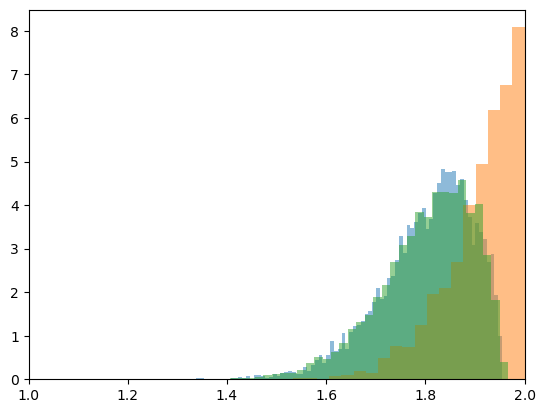

100


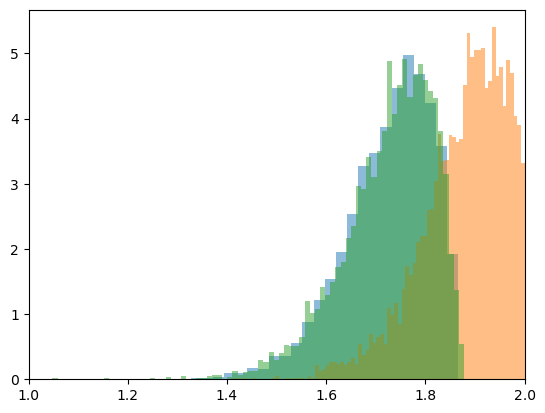

105


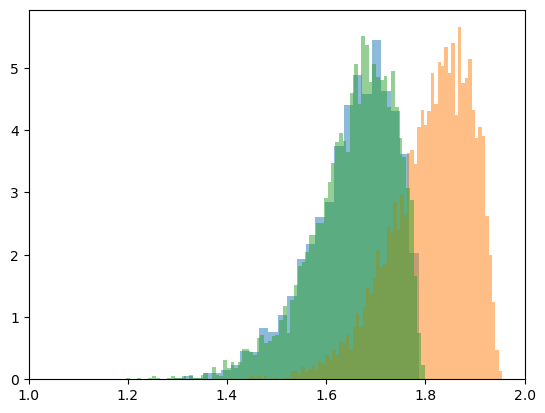

110


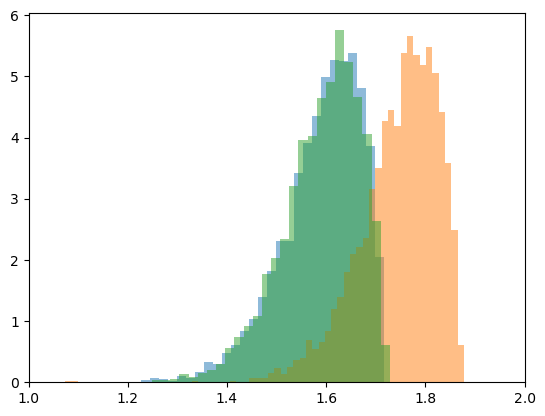

115


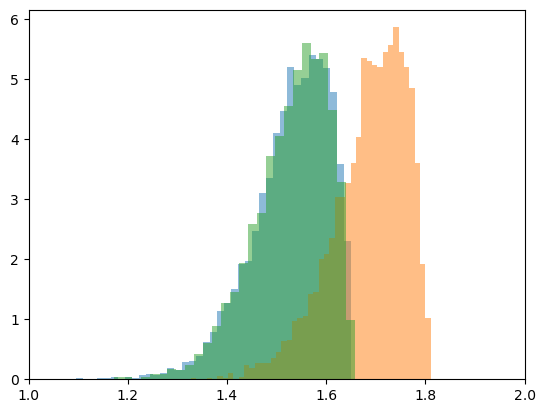

120


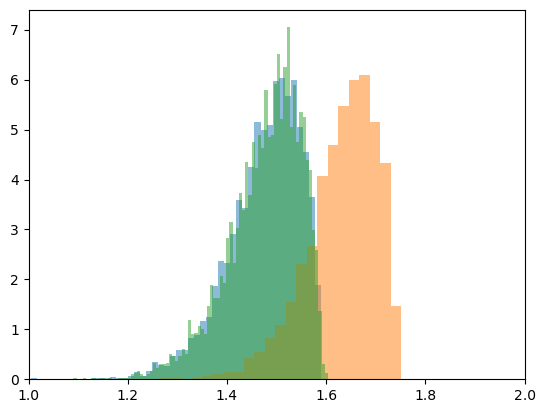

125


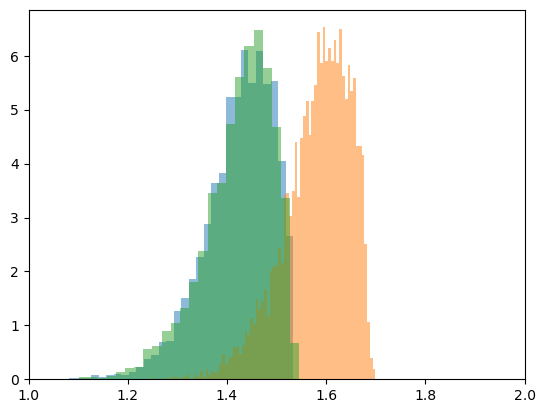

130


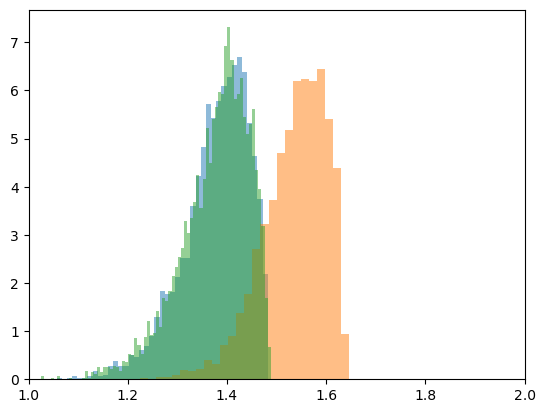

135


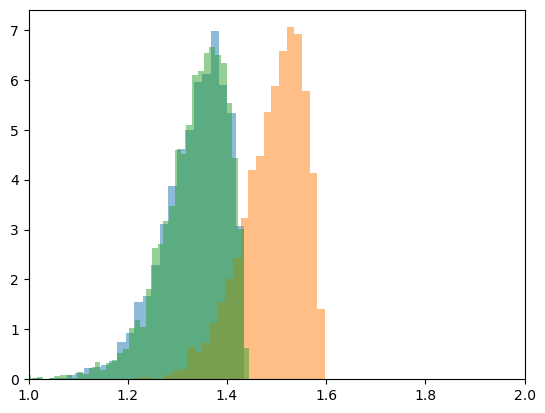

140


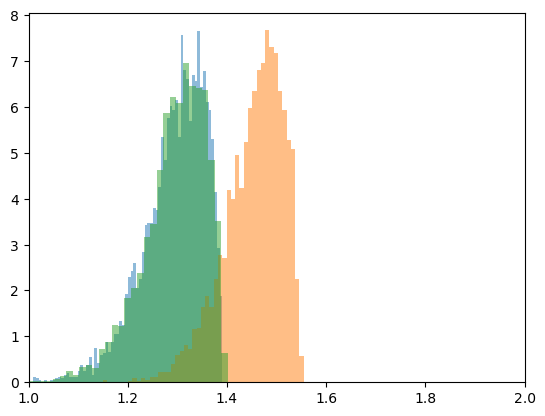

145


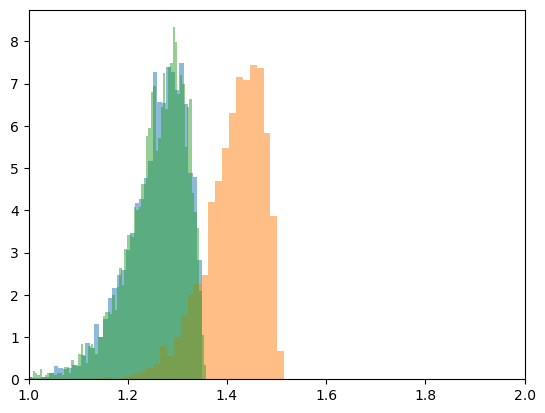

150


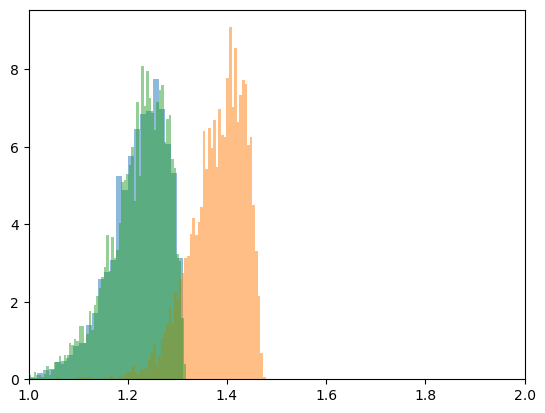

155


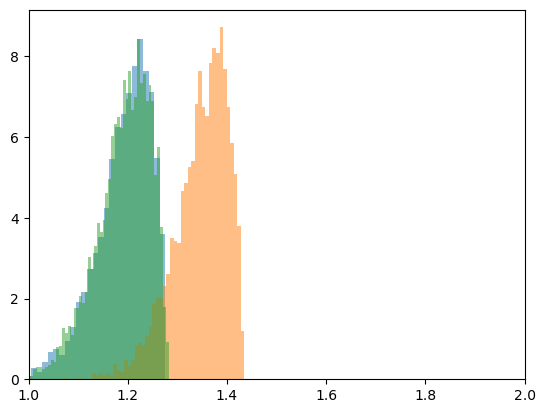

160


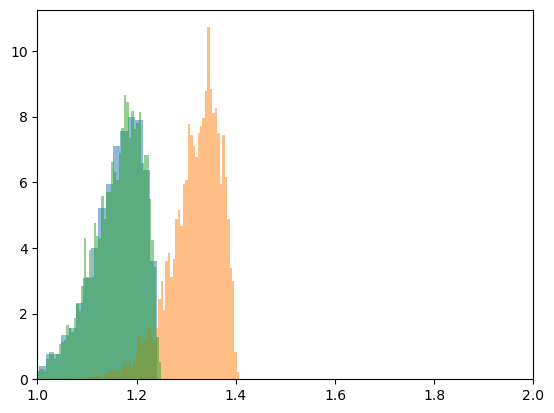

165


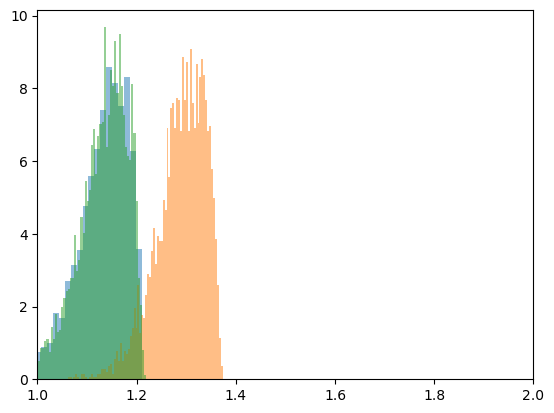

In [24]:
for i in range(len(trupeq)):
    print(vtab[i])
    plt.hist(trupeq[i][np.nonzero(trupeq[i])],80, alpha = .5, density = True)
    plt.hist( trup[i][np.nonzero(trup[i])],80, alpha = .5, density = True)
    plt.hist(trupcd[i][np.nonzero(trupcd[i])],80, alpha = .5, density = True)
    plt.xlim(1.,2.)
    # plt.ylim(0.,5.)
    plt.show()
# plt.hist(trupcd[0],80, alpha = .5, density = True)

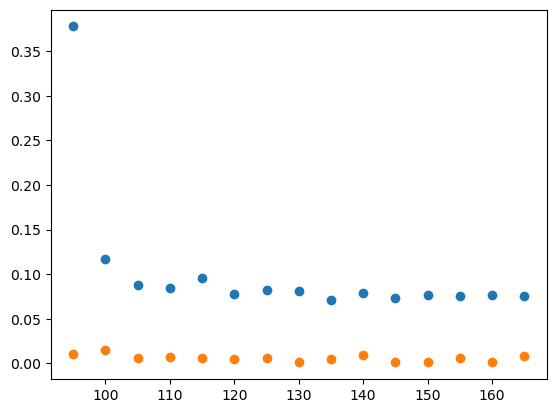

In [25]:
from scipy.stats import wasserstein_distance
dtrup, dtrupcd = [],[]
# Iterate over each subarray in trup, trupcd, and trupeq
for subarray_trup, subarray_trupcd, subarray_trupeq in zip(trup, trupcd, trupeq):
    # Calculate Wasserstein distance between trup and trupeq
    dtrup.append(wasserstein_distance(subarray_trup, subarray_trupeq))

    # Calculate Wasserstein distance between trupcd and trupeq
    dtrupcd.append( wasserstein_distance(subarray_trupcd, subarray_trupeq))

plt.plot(vtab, dtrup,'o')    
plt.plot(vtab, dtrupcd,'o') 
np.save('dtrup_dhz', dtrup)
np.save('dtrupcd_dhz', dtrupcd)

/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_55984/2086491504.py:14: RuntimeWarning: divide by zero encountered in divide
  kl_trup_trupeq = np.sum(subarray_trup * np.log(subarray_trup / subarray_trupeq))
/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_55984/2086491504.py:14: RuntimeWarning: invalid value encountered in divide
  kl_trup_trupeq = np.sum(subarray_trup * np.log(subarray_trup / subarray_trupeq))
/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_55984/2086491504.py:14: RuntimeWarning: divide by zero encountered in log
  kl_trup_trupeq = np.sum(subarray_trup * np.log(subarray_trup / subarray_trupeq))
/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_55984/2086491504.py:14: RuntimeWarning: invalid value encountered in multiply
  kl_trup_trupeq = np.sum(subarray_trup * np.log(subarray_trup / subarray_trupeq))
/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_55984/2086491504.py:15: RuntimeWarning: divide by zero encountered i

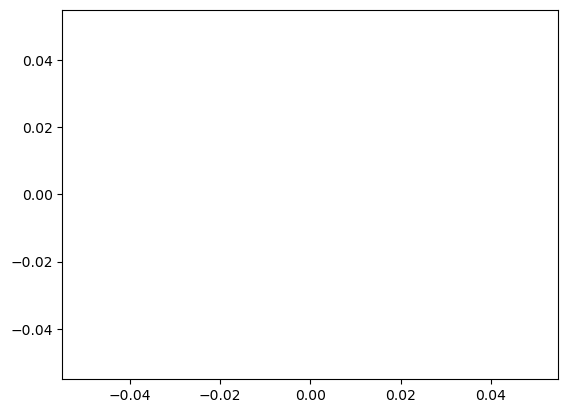

In [26]:
import numpy as np
from scipy.stats import entropy

dtrup, dtrupcd = [], []

# Iterate over each subarray in trup, trupcd, and trupeq
for subarray_trup, subarray_trupcd, subarray_trupeq in zip(trup, trupcd, trupeq):
    # Calculate entropy for trup, trupeq, and trupcd
    entropy_trup = entropy(subarray_trup)
    entropy_trupeq = entropy(subarray_trupeq)
    entropy_trupcd = entropy(subarray_trupcd)

    # Calculate KL divergence
    kl_trup_trupeq = np.sum(subarray_trup * np.log(subarray_trup / subarray_trupeq))
    kl_trupcd_trupeq = np.sum(subarray_trupcd * np.log(subarray_trupcd / subarray_trupeq))

    # Append KL divergence to lists
    dtrup.append(kl_trup_trupeq)
    dtrupcd.append(kl_trupcd_trupeq)
    
plt.plot(vtab, dtrup,'o')    
plt.plot(vtab, dtrupcd,'o') 


Parameters: 2.061153622438558e-09 0.4 2.0611536224385576e-05 2.171472409516259
Parameters: 2.061153622438558e-09 0.4 2.0611536224385576e-05 2.171472409516259


/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_11043/309462318.py:26: RuntimeWarning: overflow encountered in exp
  log_likelihood += np.sum(logk0 + np.log(beta/r) + beta*F*d + np.exp(logk0)/(r*d)*(1-np.exp(beta*F*d)))
/Users/benkuznets-speck/miniconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/benkuznets-speck/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


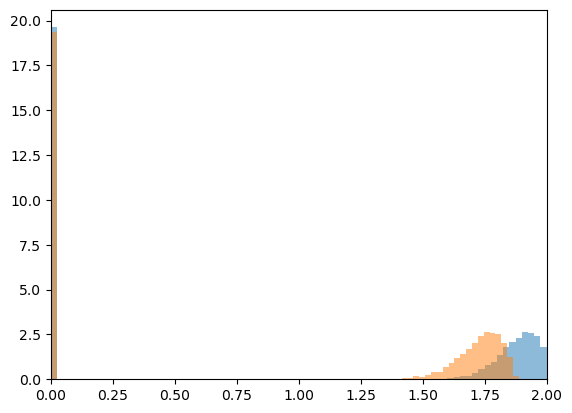

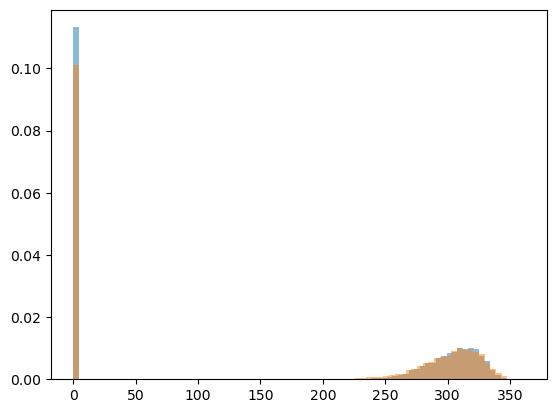

In [47]:


def fit_pt(F, t, r, t0, k0_est, initial_params):

    def likelihood(params, F):

        logk0,d = params
        beta = 1/4.1
        log_likelihood = 0

        log_likelihood += np.sum(logk0  + beta*F*d + np.exp(logk0)*(1-np.exp(beta*F*d))/(r*d))
        return -log_likelihood

    result = minimize(likelihood, initial_params, args=(F,),bounds = [(None,  None ),(None, None)], tol=1e-10)
    logk0,d = result.x
    print("Parameters:", np.exp(logk0),d, np.exp(logk0)/k0_est, logk0/np.log(k0_est))
    
    return  logk0,d

def fit_pt(t, r, t0, k0_est, initial_params):

    def likelihood(params, t):

        logk0,d = params
        beta = 1/4.1
        log_likelihood = 0
        F = r*(t-t0)
        log_likelihood += np.sum(logk0 + np.log(beta/r) + beta*F*d + np.exp(logk0)/(r*d)*(1-np.exp(beta*F*d)))
        return -log_likelihood

    result = minimize(likelihood, initial_params, args=(t,),bounds = [(None,  None ),(None, None)], tol=1e-10)
    logk0,d = result.x
    print("Parameters:", np.exp(logk0),d, np.exp(logk0)/k0_est, logk0/np.log(k0_est))
    
    return  logk0,d

# def plot_ptcd(k0, d,t):
#     r, t0 = rcdtab[0], 1.1
#     beta = 1/4.1
#     pt = k0*np.exp(beta*r*(t-t0)*d + k0/(beta*r*d)*(1-np.exp(beta*r*(t-t0)*d)))
#     plt.plot(t, pt)
#     return pt
# def plot_pt(k0, d,t):
#     r, t0 = rtab[0], .75
#     beta = 1/4.1
#     pt = k0*np.exp(beta*r*(t-t0)*d + k0/(beta*r*d)*(1-np.exp(beta*r*(t-t0)*d)))
#     plt.plot(t, pt)
#     return pt

# mini, maxi = 1, 2
# k0_est = 0.004008016032064128
initial_params  = [-20, .4 ]
logk0,d = fit_pt(trup[0], rtab[0], t0tab[0], k0, initial_params)
# plot_pt(np.exp(logk0), d,np.linspace(0.,2.,1000))
logk0,d = fit_pt(trupcd[0],250,1.05 , k0, initial_params)
# plot_ptcd(np.exp(logk0), d,np.linspace(0.,2.,1000))


# logk0,d = fit_pt(F[0], trup[0], rtab[0], t0tab[0], k0, initial_params)
# logk0,d = fit_pt(Fcd[0], trupcd[0], rcdtab[0], t0cdtab[0], k0, initial_params)


plt.hist(trup[0],80, alpha = .5, density = True)
plt.hist(trupcd[0],80, alpha = .5, density = True)
# plt.yscale('log')
plt.xlim(0.,2.)
plt.show()

plt.hist(F[0],80, alpha = .5, density = True)
plt.hist(Fcd[0],80, alpha = .5, density = True)
# plt.yscale('log')
# plt.xlim(0.,2.)
plt.show()


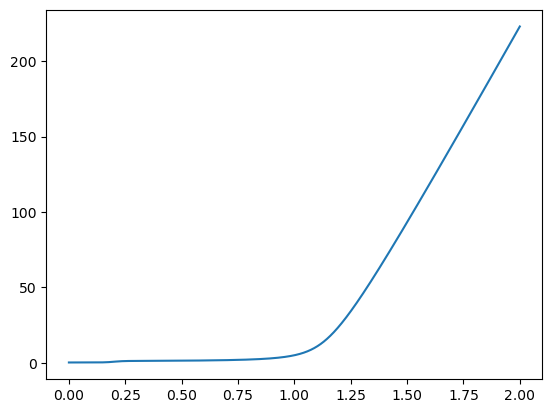

In [48]:
Feq = np.genfromtxt('Feq.csv', delimiter=',')[:,1]
plt.plot(np.linspace(0,2.,len(Feq)),Feq)

@jit(nopython=True)
def traj_trup_Feq(Feq, seed):
    np.random.seed(seed)

    dt = .0001
    t = 0.
#     xt, Fcantt, l, xeq, Fexpmol, Dx = np.zeros(steps-1),np.zeros(steps-1),np.zeros(steps-1),np.zeros(steps-1),np.zeros(steps-1),np.zeros(steps-1)
    for i in range(len(Feq)):
        
        Fmol = Feq[i]
        dF = 1.-nu*Fmol*d/dG
        kF = k0*(dF)**(1/nu-1)*np.exp(beta*dG*(1-dF**(1/nu))) 
        if dt*kF > np.random.rand():
            trup = t
            Frup = Fmol
            break
            

        t += dt
 
    return trup, Frup

def get_trup_tab_Feq(Feq,num_trajs = 500):
    trup, F = np.zeros(num_trajs), np.zeros(num_trajs)
    for i in range(num_trajs):
    #     print(i)
        seed = np.random.choice(np.arange(1099000))
    #     print(seed)
        trup[i], F[i] = traj_trup_Feq(Feq, seed)
#         print(i,trup[i])
    return trup, F
trupeq, Frup_eq = [],[]
ti, Fi = get_trup_tab_Feq(Feq, num_trajs = 10**4)
trupeq.append(ti)
Frup_eq.append(Fi)



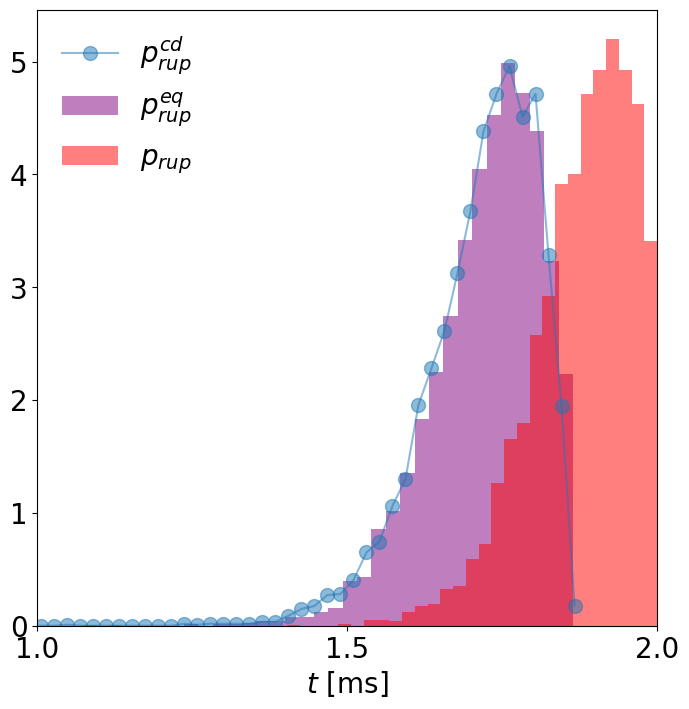

In [73]:
# Assuming trupcd is your data array
plt.figure(figsize=(8, 8))
data = trupcd[0][np.nonzero(trupcd[0])]

# Compute histogram
hist, bins = np.histogram(data, bins=80, density=True)

# Plot histogram values against bin edges as points
plt.plot(bins[:-1], hist, marker='o', linestyle='-', alpha=0.5, ms = 10, label=r'$p^{cd}_{rup}$')

plt.hist(trupeq[0][np.nonzero(trupeq[0])],80, alpha = .5, density = True, color = 'purple', label=r'$p^{eq}_{rup}$', linewidth=5)
plt.hist( trup[0][np.nonzero(trup[0])],80, alpha = .5, density = True, color = 'red', label=r'$p_{rup}$')
# Add labels and title
plt.xlim(1.,2.)

plt.xlabel(r'$t$ [ms]', fontsize=20)
# plt.ylabel('Distances [nm]', fontsize=20)

# Set custom tick positions
custom_ticks = np.arange(1.0, 2.1, 0.5)
# custom_ticksy = np.arange(0.0, 350, 50)
plt.xticks(custom_ticks)

# Set the font size of ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Show legend with fontsize 15
plt.legend(fontsize=20,frameon=False)
plt.savefig('fig2a.pdf', bbox_inches='tight')
plt.show()

# Show plot
plt.show()

In [537]:
kcant

10

/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_78009/3061411341.py:8: RuntimeWarning: overflow encountered in exp
  log_likelihood += np.sum(logk0 + beta*r*(t-t0)*d + np.exp(logk0)/(beta*r*d)*(1-np.exp(beta*r*(t-t0)*d)))
/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_78009/3061411341.py:8: RuntimeWarning: overflow encountered in multiply
  log_likelihood += np.sum(logk0 + beta*r*(t-t0)*d + np.exp(logk0)/(beta*r*d)*(1-np.exp(beta*r*(t-t0)*d)))
/var/folders/q4/4wgv01t53ss2w3btpzzlgb6h0000gn/T/ipykernel_78009/3061411341.py:8: RuntimeWarning: invalid value encountered in multiply
  log_likelihood += np.sum(logk0 + beta*r*(t-t0)*d + np.exp(logk0)/(beta*r*d)*(1-np.exp(beta*r*(t-t0)*d)))


3.184467000176565 2.7406177306678594


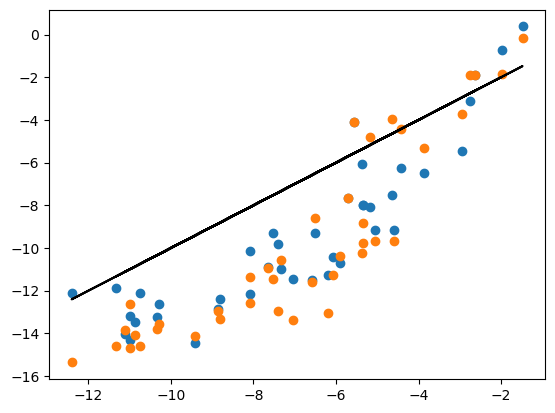

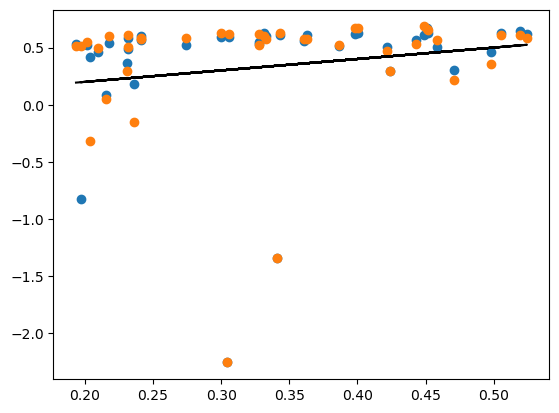

In [145]:
def fit_pt(t, r, t0, k0_est, initial_params):

    def likelihood(params, trup):
    # Compute the likelihood for the given parameters and samples
        logk0,d = params
        beta = 1/4.1
        log_likelihood = 0
        log_likelihood += np.sum(logk0 + beta*r*(t-t0)*d + np.exp(logk0)/(beta*r*d)*(1-np.exp(beta*r*(t-t0)*d)))
        return -log_likelihood

#     result = minimize(likelihood, initial_params, args=(trup,), tol=1e-10)
    result = minimize(likelihood, initial_params, args=(trup,),bounds = [(None, None),(None, None)], tol=1e-10)
    logk0,d = result.x
#     print( result.x)
#     print("Parameters:", np.exp(logk0),d, (np.exp(logk0))/k0_est)
    
    return  logk0,d


import os
import re
import numpy as np

# Directory containing the files
directory = 'data_cd0/'

# Regular expression pattern to extract 'a' and 'b' from file names
pattern = r'lnk0_([\d.]+)_([\d.]+)\.npy'
lnk0, lnk0cd_fit, lnk0_fit, dU, d, dcd_fit, d_fit = [], [], [], [], [], [], []
# Loop through files in the directory
for filename in os.listdir(directory):
    if filename.startswith('lnk0_') and filename.endswith('.npy'):
        # Extract 'a' and 'b' from the file name using regex
        match = re.match(pattern, filename)
        if match:
            a = float(match.group(1))
            b = float(match.group(2))
            dU.append(a)
            d.append(b/2)
#             print(f"File: {filename}, a: {a}, b: {b}")
            # Load the file and assign it to 'lnk0'
            lnk0.append(np.load(os.path.join(directory, filename)))
            trup = np.load('data_cd0/trup_' + str(a) + '_' + str(b)+'.npy')
            trupcd = np.load('data_cd0/trupcd_' + str(a) + '_' + str(b)+'.npy')
            r = np.load('data_cd0/r_' + str(a) + '_' + str(b)+'.npy')
            rcd = np.load('data_cd0/rcd_' + str(a) + '_' + str(b)+'.npy')
            t0 = np.load('data_cd0/t0_' + str(a) + '_' + str(b)+'.npy')
            t0cd = np.load('data_cd0/t0cd_' + str(a) + '_' + str(b)+'.npy')
#             d.append(b)
            
            initial_params = [lnk0[-1]+np.random.randn(),d[-1]+np.random.randn() ]
#             initial_params = [-10, .4]
            logk0cd_fiti,dcd_fiti = fit_pt(trupcd,  rcd, t0cd, np.exp(lnk0[-1]),initial_params)
            lnk0cd_fit.append(logk0cd_fiti)
            dcd_fit.append(dcd_fiti)
            
            logk0_fiti,d_fiti = fit_pt(trup,  r, t0, np.exp(lnk0[-1]),initial_params)
            lnk0_fit.append(logk0_fiti)
            d_fit.append(d_fiti)


lnk0cd_fit, lnk0_fit = np.asarray(lnk0cd_fit), np.asarray(lnk0_fit)
plt.plot(lnk0, lnk0cd_fit,'o')
plt.plot(lnk0, lnk0_fit,'o')
print(np.mean(abs(lnk0 - lnk0_fit)), np.mean(abs(lnk0 - lnk0cd_fit)))
# plt.plot(lnk0, .5*(lnk0cd_fit + lnk0_fit),'o')
plt.plot(lnk0, lnk0, 'k')
plt.show()
plt.plot(d, dcd_fit,'o')
plt.plot(d, d_fit,'o')
plt.plot(d, d, 'k')
plt.show()